In [2]:
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import librosa.util
from sklearn.model_selection import train_test_split

In [3]:
metadata = pd.read_csv("data/UrbanSound8K.csv")

In [4]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [5]:
class_frequency = metadata['class'].value_counts()
print(class_frequency)

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64


In [6]:
metadata.drop(columns=['fsID','start','end'],inplace=True)

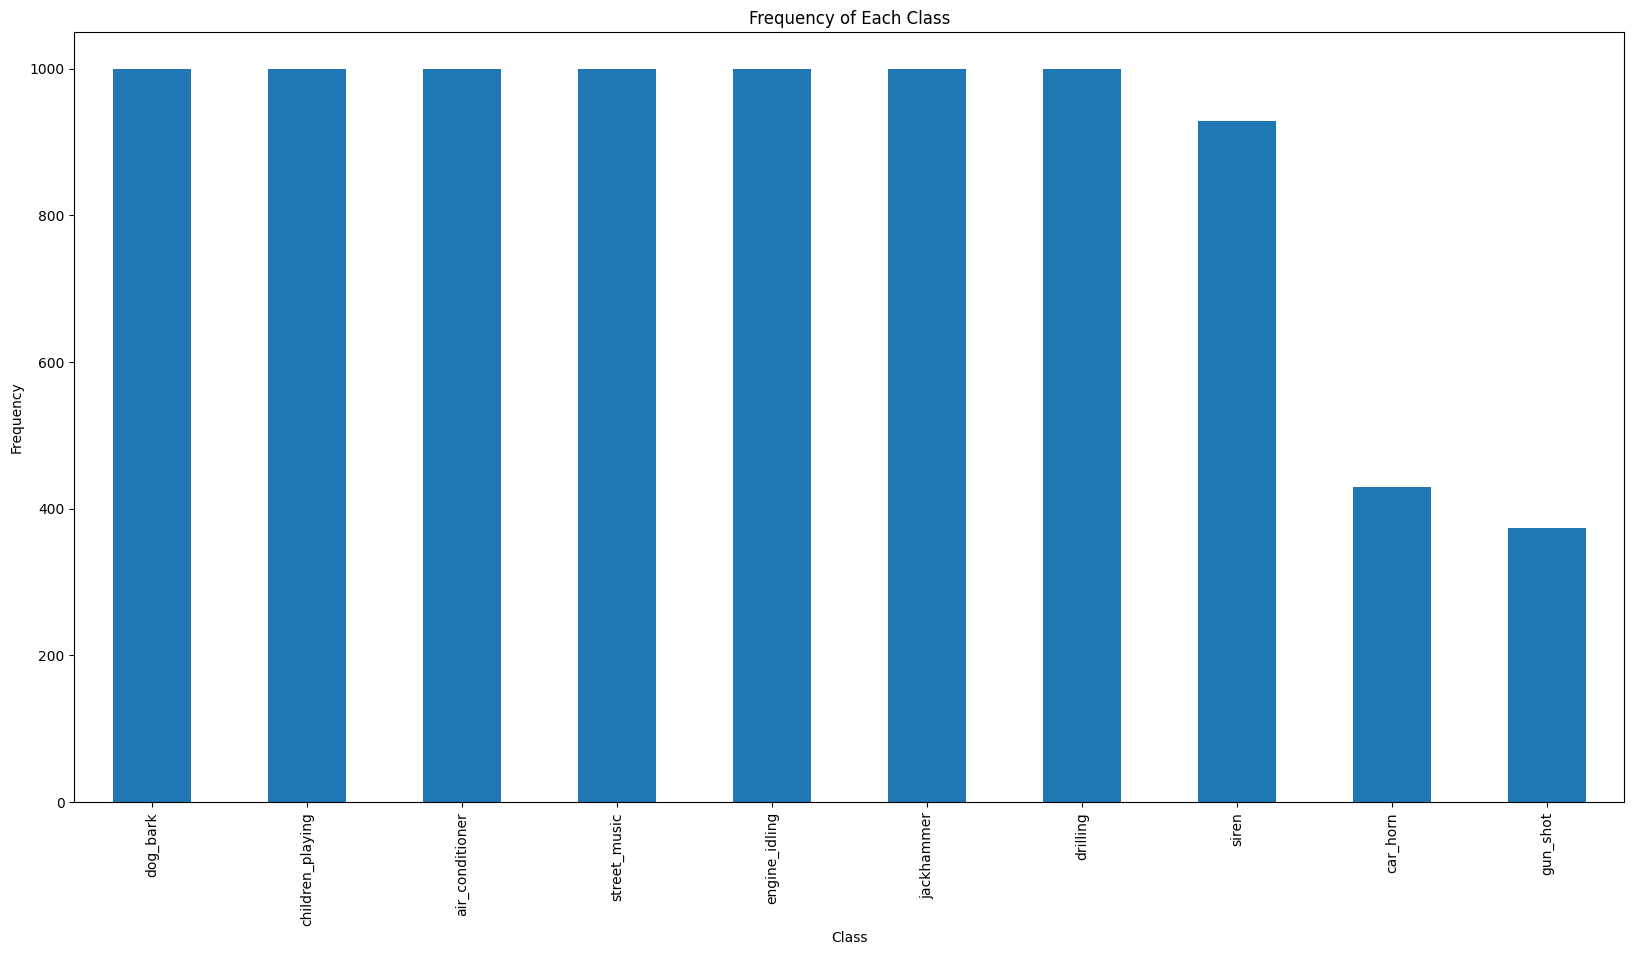

In [7]:
class_frequency.plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(20, 10.)
fig.savefig('histogrammeclass', dpi=100)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Frequency of Each Class')
plt.show()


In [8]:
def display_waveform(audio_path, metadata, save_path=None):
    file_name = os.path.basename(audio_path)
    row = metadata[metadata['slice_file_name'] == file_name]
    if not row.empty:
        class_name = row['class'].values[0]
        y, sr = librosa.load(audio_path)
        plt.figure(figsize=(14, 5))
        librosa.display.waveshow(y, sr=sr)
        plt.title(f'Waveform - Class: {class_name}')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')

        if save_path is not None:
            plt.savefig(save_path, dpi=400)
        else:
            plt.show()
    else:
        print(f"No matching entry found in metadata for file: {file_name}")

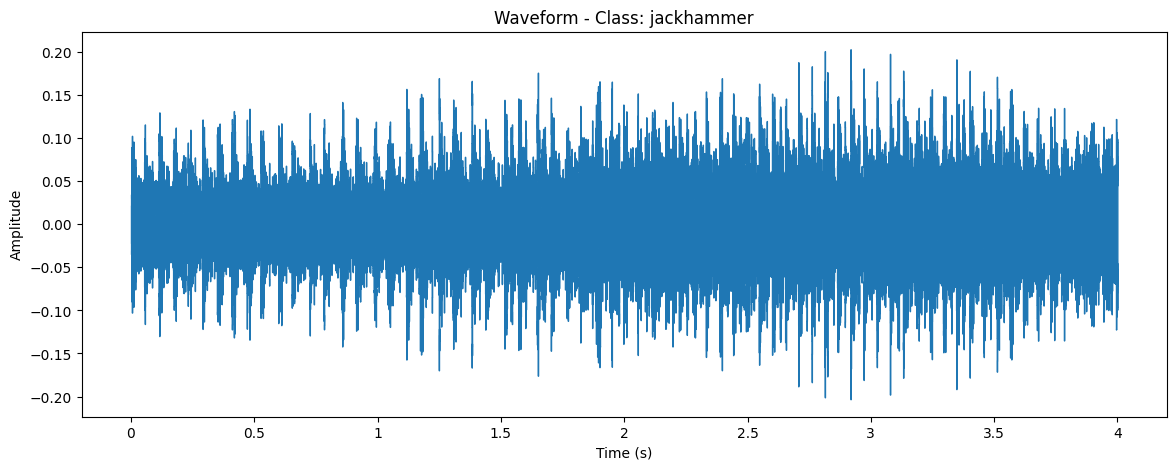

In [9]:
display_waveform('data/fold1/103074-7-4-1.wav', metadata, 'waveform.png')

In [10]:
def display_spectrogram(audio_path,metadata, save_path=None):
    file_name = os.path.basename(audio_path)
    row = metadata[metadata['slice_file_name'] == file_name]
    if not row.empty:
        class_name = row['class'].values[0]
        y, sr = librosa.load(audio_path, sr=None)
        D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
        plt.figure(figsize=(14, 5))
        librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', vmin=-80, vmax=0)
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Spectrogram - Class: {class_name}')
        if save_path is not None:
            plt.savefig(save_path, dpi=400)
        else:
            plt.show()
    else:
        print(f"No matching entry found in metadata for file: {file_name}")

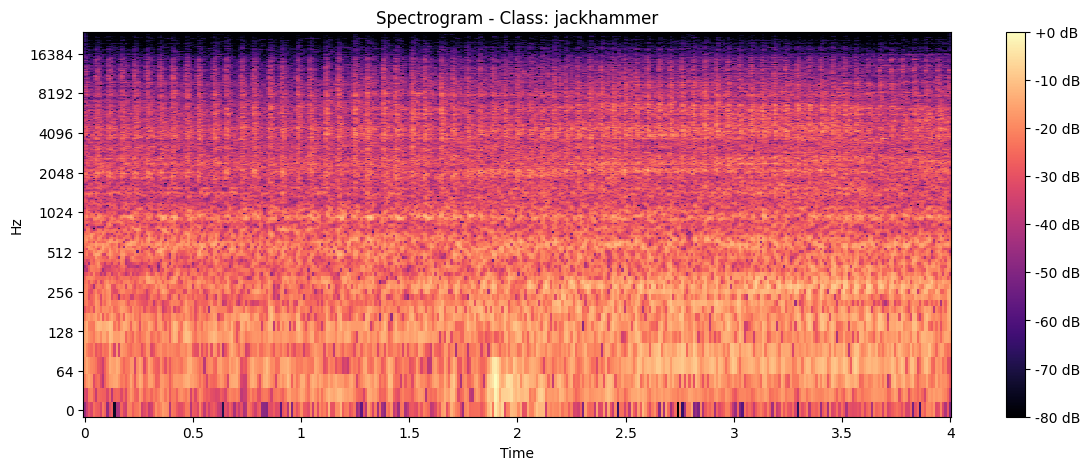

In [11]:
display_spectrogram('data/fold1/103074-7-4-1.wav',metadata,'spectogram')

In [12]:
def display_log_mel_spectrogram(audio_path,metadata, save_path=None):
    file_name = os.path.basename(audio_path)
    row = metadata[metadata['slice_file_name'] == file_name]
    if not row.empty:
        class_name = row['class'].values[0]
        y, sr = librosa.load(audio_path, sr=None)
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
        log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
        plt.figure(figsize=(14, 5))
        librosa.display.specshow(log_mel_spec, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Log-mel Spectrogram - Class: {class_name}')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')

        if save_path is not None:
            plt.savefig(save_path, dpi=400)
        else:
            plt.show() 
    else:
        print(f"No matching entry found in metadata for file: {file_name}")

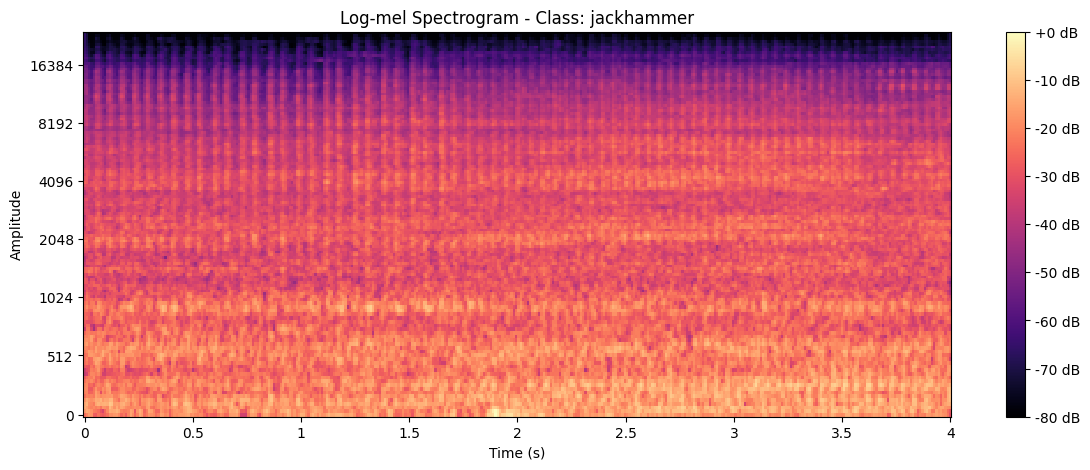

In [13]:
display_log_mel_spectrogram('data/fold1/103074-7-4-1.wav',metadata,'log-melspectogram')

In [14]:
folds = ['fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9', 'fold10']

In [15]:
def extract_mfcc(audio_path, n_mfcc=20, n_fft=1024, hop_length=1024):
    y, sr = librosa.load(audio_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    return mfccs

In [16]:
extract_mfcc('data/fold1/40722-8-0-0.wav')

array([[-214.40674  , -262.10626  , -238.71696  , ..., -214.13898  ,
        -247.8855   , -155.39136  ],
       [ 161.89557  ,  220.21301  ,  216.99881  , ...,  210.92094  ,
         197.4122   ,  147.5217   ],
       [ -11.496252 ,  -36.46849  ,  -49.659607 , ...,  -64.9936   ,
         -52.667225 ,  -65.51056  ],
       ...,
       [  -8.540657 ,  -18.773846 ,  -10.840315 , ...,    4.3013897,
          14.685268 ,   15.245171 ],
       [   4.3512444,    3.615893 ,   -1.6160021, ...,  -10.649942 ,
         -11.903713 ,    4.841668 ],
       [   6.9257083,   16.45649  ,   10.597417 , ...,  -18.299967 ,
         -27.886974 ,  -15.37924  ]], dtype=float32)

In [17]:
df=metadata


In [18]:

data=[]

for index, row in df.iterrows():
    file_name = os.path.join(os.path.abspath('../audio/data/'), 'fold' + str(row["fold"]), str(row['slice_file_name']))
    mfccs = extract_mfcc(file_name)
    mfccs_features = np.mean(mfccs.T,axis=0)
    class_label=row["class"]
    data.append([class_label,mfccs_features])
    

In [19]:
data=pd.DataFrame(data,columns=['class','features'])
data.head()

,class,features
0,dog_bark,"[-303.84015, 61.49566, -114.43784, -56.294075,..."
1,children_playing,"[-491.61014, 99.27499, -42.563896, 51.936443, ..."
2,children_playing,"[-525.6008, 111.167465, -38.15405, 43.07866, 8..."
3,children_playing,"[-481.00198, 91.57195, -24.025576, 42.66514, 1..."
4,children_playing,"[-512.3732, 102.649414, -43.50289, 50.77397, 1..."


In [27]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)
encoded_classes = onehot_encoder.fit_transform(data[['class']])
encoded_classes

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [30]:
data_encoded = pd.concat([data[['features']], pd.DataFrame(encoded_classes, columns=onehot_encoder.get_feature_names_out(['class']))], axis=1)
data_encoded.head()

,features,class_air_conditioner,class_car_horn,class_children_playing,class_dog_bark,class_drilling,class_engine_idling,class_gun_shot,class_jackhammer,class_siren,class_street_music
0,"[-303.84015, 61.49566, -114.43784, -56.294075,...",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"[-491.61014, 99.27499, -42.563896, 51.936443, ...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"[-525.6008, 111.167465, -38.15405, 43.07866, 8...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"[-481.00198, 91.57195, -24.025576, 42.66514, 1...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"[-512.3732, 102.649414, -43.50289, 50.77397, 1...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
X_encoded = np.array(data_encoded['features'].tolist())
y_encoded = encoded_classes

In [44]:
data_encoded['fold'] = df['fold']

In [45]:
data_encoded.head()

,features,class_air_conditioner,class_car_horn,class_children_playing,class_dog_bark,class_drilling,class_engine_idling,class_gun_shot,class_jackhammer,class_siren,class_street_music,fold
0,"[-303.84015, 61.49566, -114.43784, -56.294075,...",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,"[-491.61014, 99.27499, -42.563896, 51.936443, ...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,"[-525.6008, 111.167465, -38.15405, 43.07866, 8...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3,"[-481.00198, 91.57195, -24.025576, 42.66514, 1...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
4,"[-512.3732, 102.649414, -43.50289, 50.77397, 1...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [41]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
all_accuracies = []